Extract Zip file

In [16]:
from zipfile import ZipFile
file_name = "digit-recognizer.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


Read csv file

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
   
d0 = pd.read_csv('train.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

Standardize the data

In [18]:
labels = l
data = d

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

sample_data = standardized_data

(42000, 784)


initializing pca

In [19]:
from sklearn import decomposition
pca = decomposition.PCA()

configuring the number of components

In [20]:
pca_data_List = []
x_projected =  []

dims=[2, 49, 175, 196, 392] 

for i in dims:
  pca.n_components = i
  pca_data = pca.fit_transform(sample_data)
  x_projected.append(pca.inverse_transform(pca_data))

Determine and plot the loss

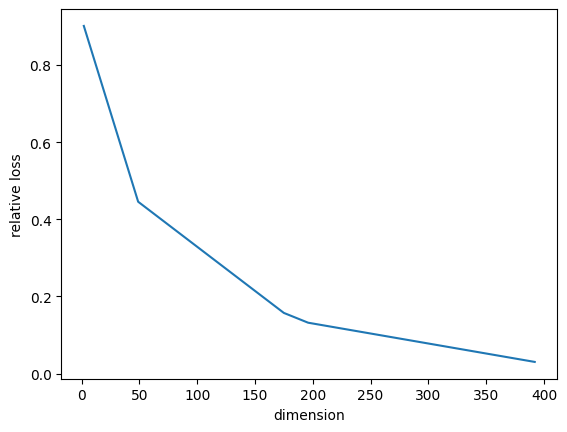

In [21]:
from re import I

norm_sample_data = np.sum((sample_data) ** 2, axis=1).mean()
losses= []
relativ_losses = []

for i in range(0,len(dims)):
  loss = np.sum((sample_data - x_projected[i]) ** 2, axis=1).mean()
  relative_loss = loss/norm_sample_data
  losses.append(loss)
  relativ_losses.append(relative_loss)

plt.xlabel("dimension")
plt.ylabel("relative loss")
plt.plot(dims, relativ_losses)

fig = plt
fig.savefig("relation between dimension and relative loss")


Plot reconstructed images

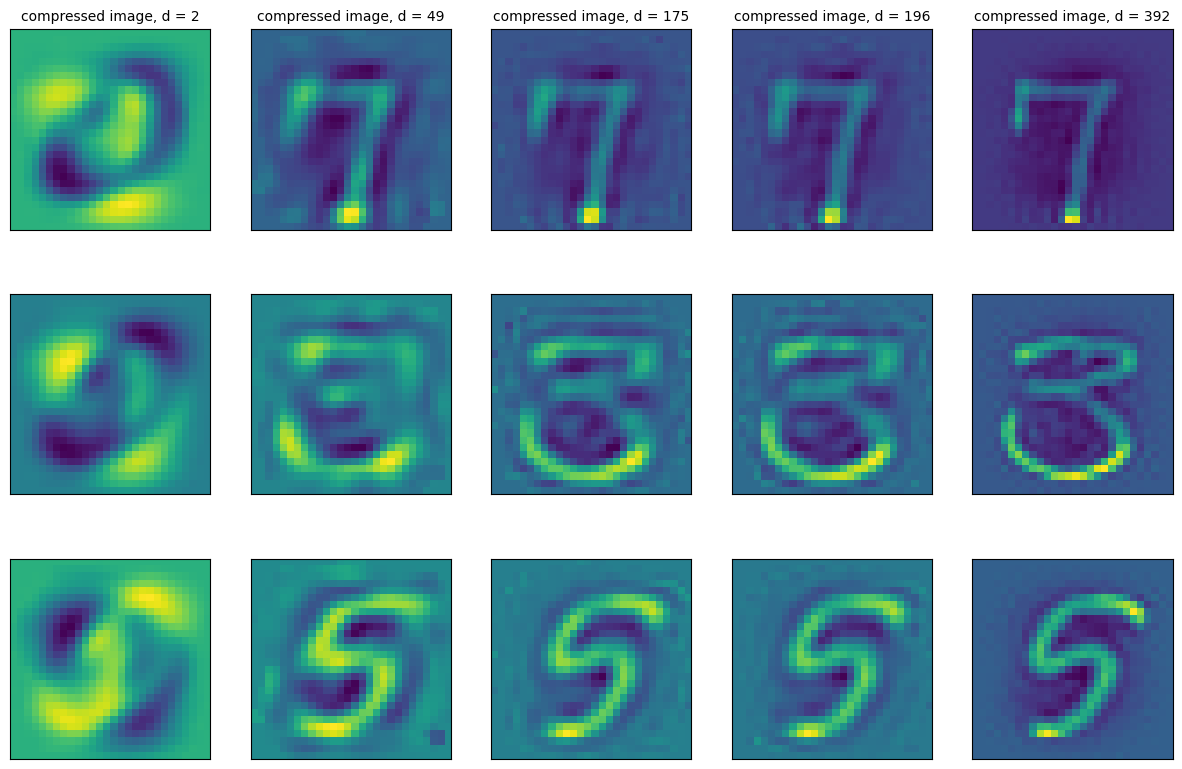

In [22]:
arrayList_dimensions = []
arrayList_orig = []

arr_orig = np.zeros(shape =(28,28))
arr_reduced = np.zeros(shape =(28,28))

for i in range(0,3):
  arr_orig = np.reshape(sample_data[i+6], (28,28))
  arrayList_orig.append(arr_orig)

for j in range(0, len(dims)):
  arrayList_reduced = []
  for i in range(0,3):
    arr_reduced = np.reshape(x_projected[j][i+6], (28,28))
    arrayList_reduced.append(arr_reduced)
  arrayList_dimensions.append(arrayList_reduced)


fig,axs = plt.subplots(3,5,figsize=(15,10))
axs[0,4].set_title("original image", fontsize=10)

for j in range(0,len(dims)):
  axs[0,j].set_title("compressed image, d = " + str(dims[j]), fontsize=10)
  for i in range(0,3):
    axs[i,4].imshow(arrayList_orig[i])
    axs[i,4].set_xticks([])
    axs[i,4].set_yticks([])
    axs[i,j].imshow(arrayList_dimensions[j][i])
    axs[i,j].set_xticks([])
    axs[i,j].set_yticks([])


plt.subplots_adjust(wspace=0.2, hspace=0.1)

fig.savefig("original_vs_compressed")

#X_projected = np.reshape(X_projected, 15000, (28,28))